In [65]:
# a model after cleaning

In [45]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
df = pd.read_pickle('pickles/df2.pkl')

In [47]:
df.fillna(0,inplace=True)

In [48]:
x_tr,x_te,y_tr,y_te = train_test_split(df.select_dtypes(exclude='O').drop('SALARY',axis=1),df['SALARY'])
lr = LinearRegression()
lr.fit(x_tr,y_tr)
p = lr.predict(x_te)
r2_score(y_te,p)*100

61.75963959645213

In [49]:
coefs= pd.DataFrame([x_tr.columns,lr.coef_]).T
coefs.rename(columns={0:'feature',1:'coef'},inplace=True)
coefs.sort_values(by='coef',ascending=False,inplace=True)

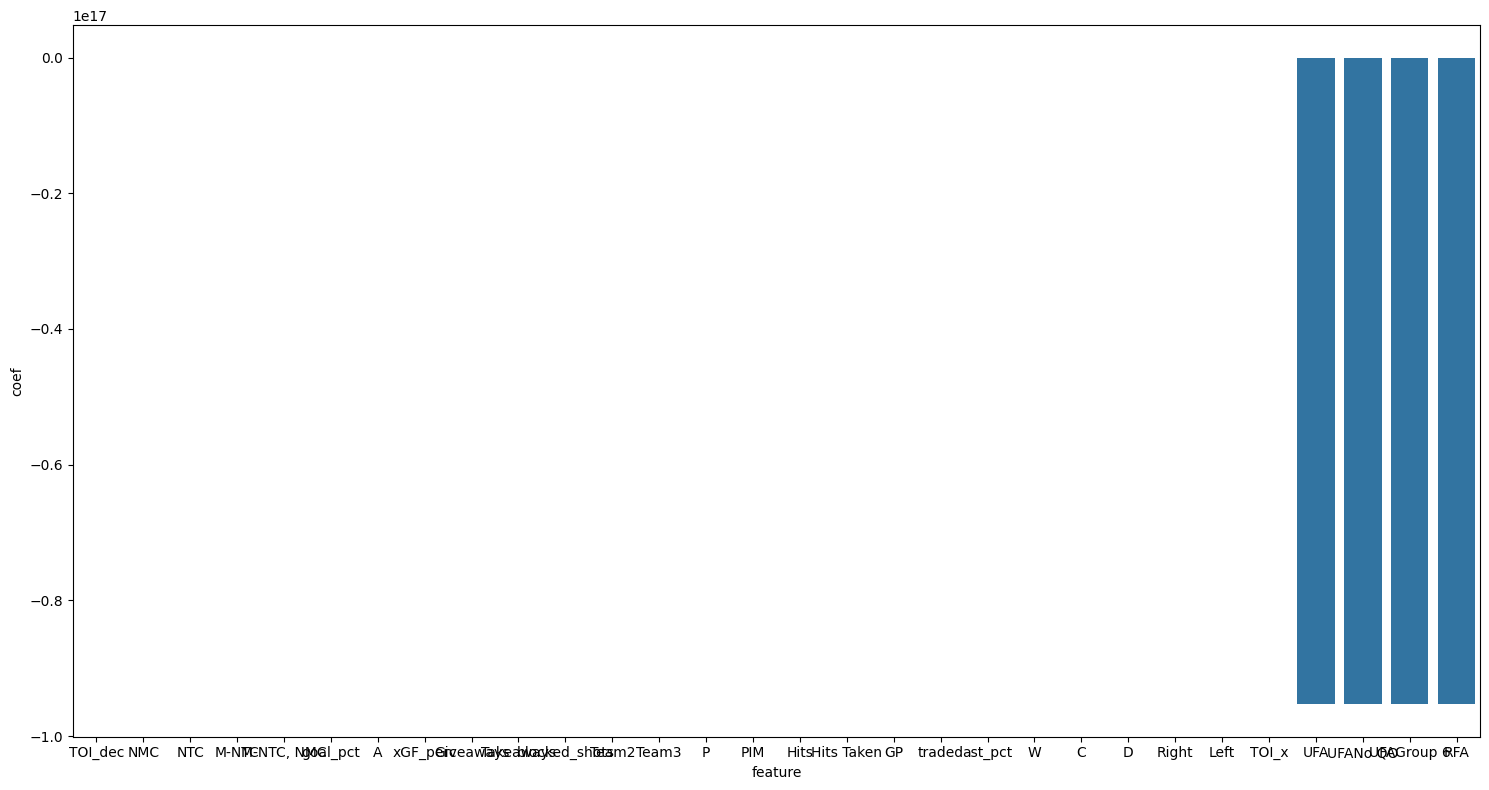

In [50]:
plt.figure(figsize=(15,8))
sns.barplot(x=coefs['feature'],y=coefs['coef'])
plt.tight_layout()

In [51]:
coefs

,feature,coef
17,TOI_dec,7885037898672.25
6,NMC,2688731.890625
7,NTC,1698265.351562
4,M-NTC,1247628.03125
5,"M-NTC, NMC",1140350.34375
28,goal_pct,368667.121094
14,A,59640.5
18,xGF_perc,26815.75
20,Giveaways,24802.0
21,Takeaways,6765.0


In [52]:
bad_coefs = coefs.iloc[0:6].feature

In [53]:
df.drop(list(bad_coefs),axis=1,inplace=True)

In [55]:
df.drop(['Team2','Team3'],axis=1,inplace=True)
df.drop(['UFAGroup 6','UFANo QO','UFA'],axis=1,inplace=True)

In [60]:
df.drop(['RFA'],axis=1,inplace=True)

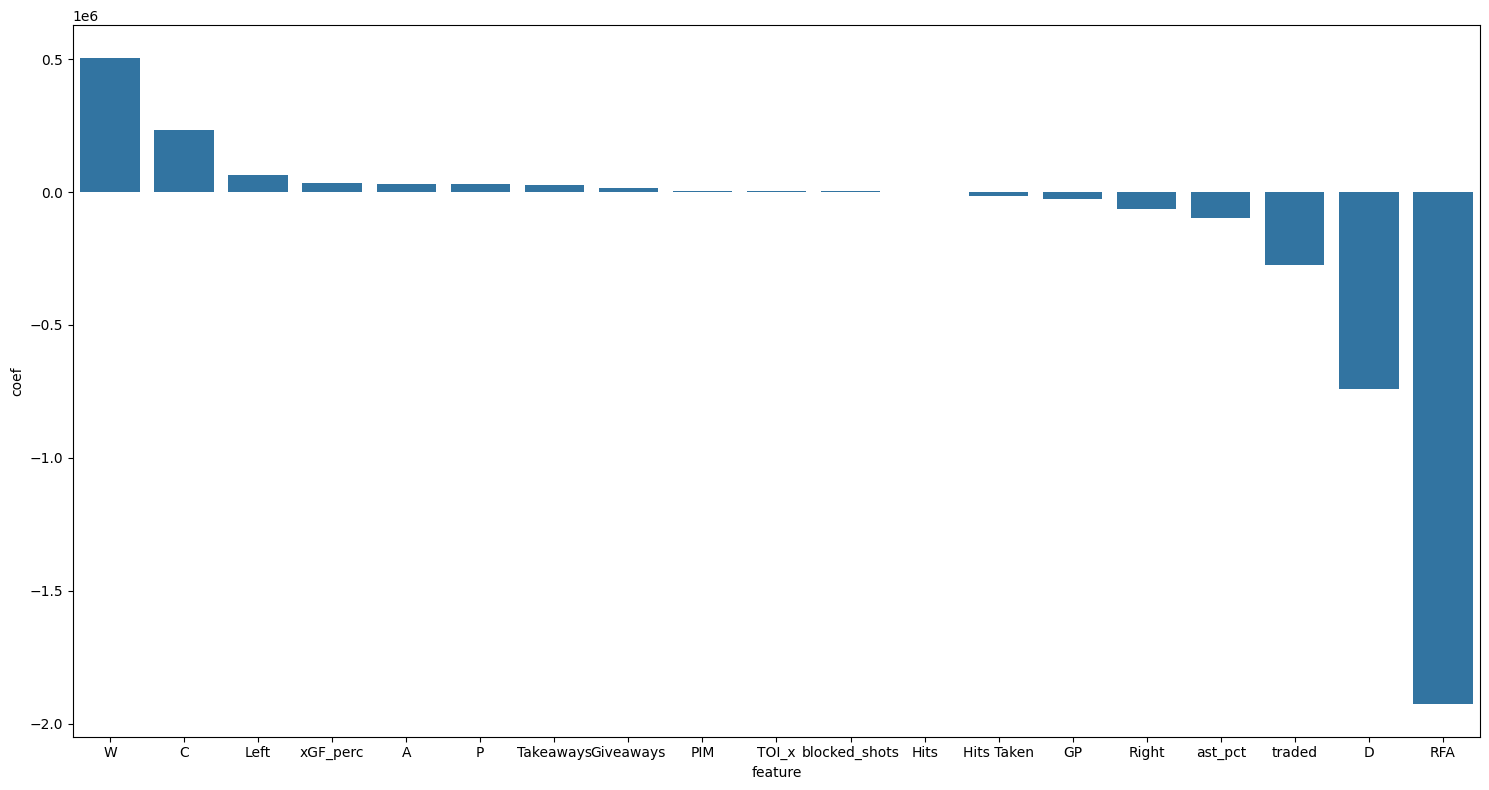

In [61]:
plt.figure(figsize=(15,8))
sns.barplot(x=coefs['feature'],y=coefs['coef'])
plt.tight_layout()

In [62]:
x_tr,x_te,y_tr,y_te = train_test_split(df.select_dtypes(exclude='O').drop('SALARY',axis=1),df['SALARY'])
lr = LinearRegression()
lr.fit(x_tr,y_tr)
p = lr.predict(x_te)
r2_score(y_te,p)*100

51.90006580852462

In [63]:
coefs= pd.DataFrame([x_tr.columns,lr.coef_]).T
coefs.rename(columns={0:'feature',1:'coef'},inplace=True)
coefs.sort_values(by='coef',ascending=False,inplace=True)

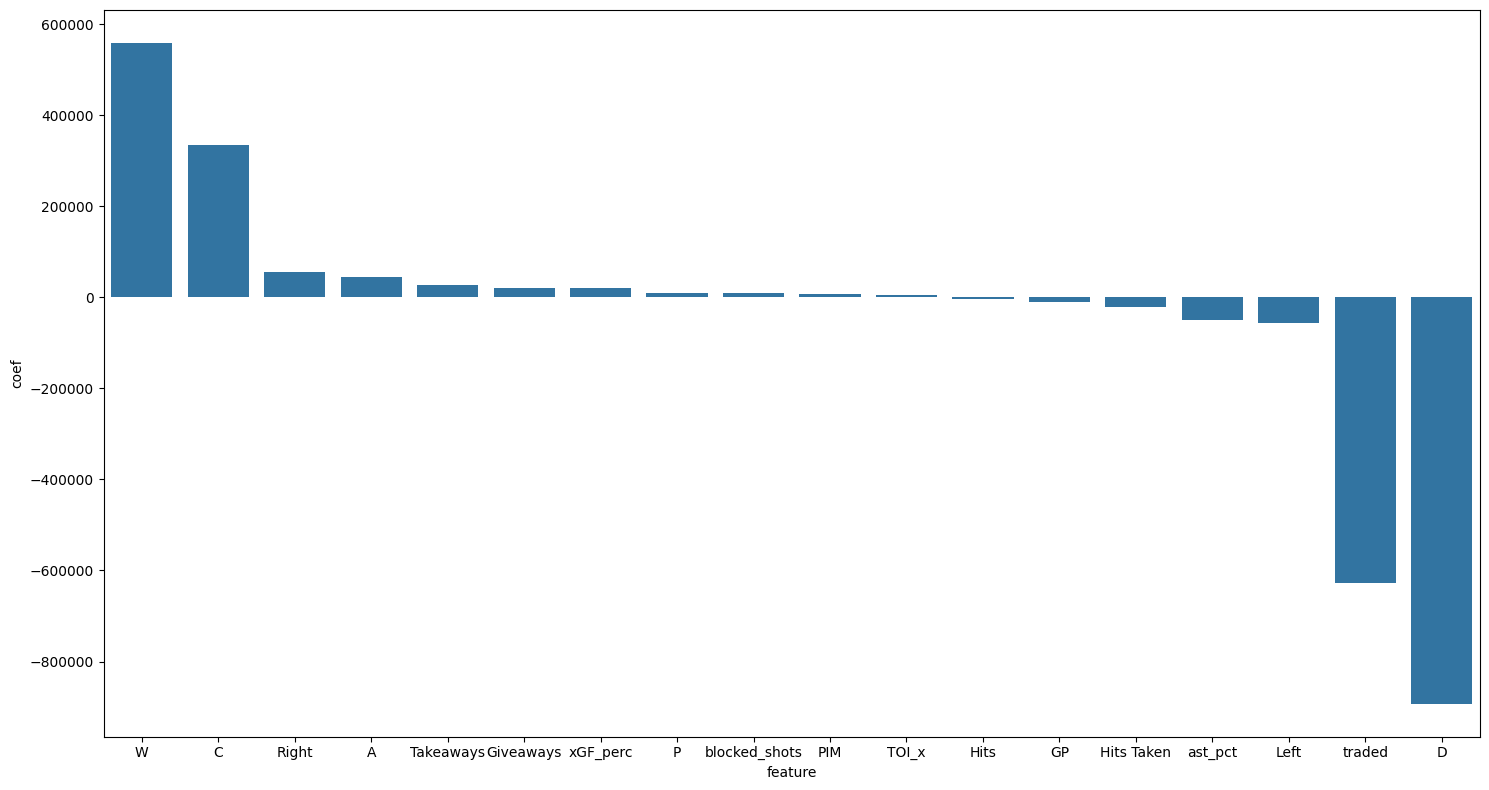

In [64]:
plt.figure(figsize=(15,8))
sns.barplot(x=coefs['feature'],y=coefs['coef'])
plt.tight_layout()

In [68]:
#df.to_pickle('pickles/df3.pkl')